In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
import pandas as pd

In [105]:
results = pd.read_csv('BC_final_results.csv', index_col=0)
sample_info = pd.read_csv('BC_sample_info.csv', index_col=0)

In [106]:
df = pd.read_table('data/Layer2_BC_count_matrix-1.tsv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

dfm = np.log10(df + 1)

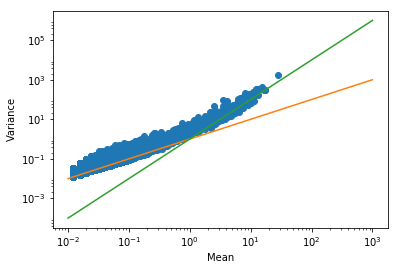

In [107]:
figsize(6, 4)
plt.loglog()
plt.scatter(df.mean(), df.var());
xy = [1e-2, 1e3]
plt.plot(xy, xy, c='C1');
plt.plot(xy, np.square(xy), c='C2');
plt.xlabel('Mean')
plt.ylabel('Variance');

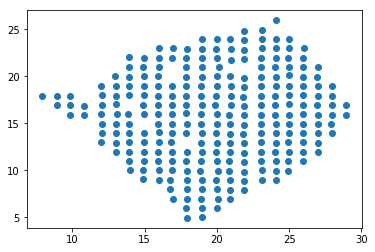

In [108]:
plt.scatter(sample_info.x, sample_info.y);

In [109]:
results.model.value_counts()

SE    12856
Name: model, dtype: int64

In [131]:
results['pval'] = results['pval'].clip_lower(results.query('pval > 0')['pval'].min() / 2)
results['qval'] = results['qval'].clip_lower(results.query('qval > 0')['qval'].min() / 2)

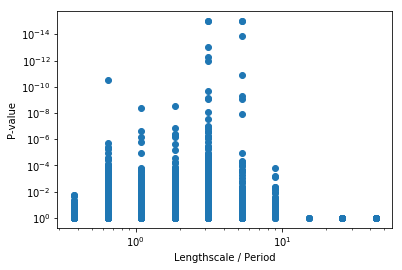

In [132]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

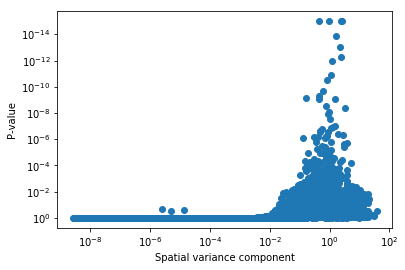

In [133]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

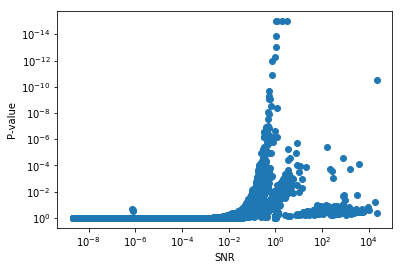

In [147]:
plt.loglog()
plt.scatter(1. / results.max_delta, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('P-value');

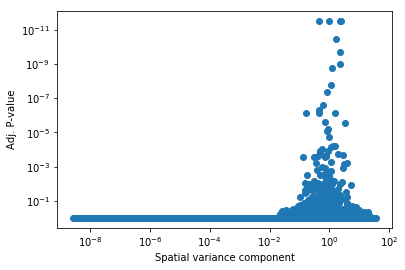

In [134]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Adj. P-value');

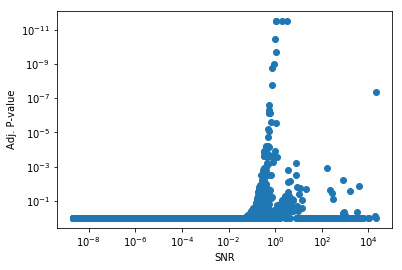

In [148]:
plt.loglog()
plt.scatter(1./ results.max_delta, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('Adj. P-value');

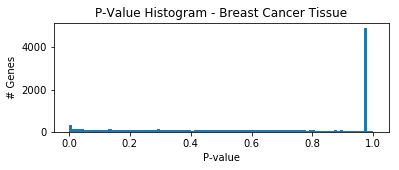

In [135]:
figsize(6, 2)
plt.hist(results.pval, bins=100);
plt.title('P-Value Histogram - Breast Cancer Tissue')
plt.ylabel('# Genes')
plt.xlabel('P-value');

plt.savefig('BC-pvalue-hist.pdf')

In [136]:
results.query('qval < 0.05').shape

(114, 15)

In [137]:
N = 5
top_per_ls = results.query('qval < 0.05') \
                  .sort_values('qval', ascending=True) \
                  .groupby('l') \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls

,g,max_delta,max_ll,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_null,D,pval,qval
3249,SNAP25,0.000045,111.715654,-1.371608,0.838175,250,0.000313,0.641736,4,SE,-201.345464,67.668498,44.047156,3.205591e-11,4.121108e-08
2710,HMGCS2,0.123198,-185.477049,-2.956878,3.822974,250,0.001039,0.641736,4,SE,393.039941,-208.160495,22.683446,1.910063e-06,6.296352e-04
2837,SSPO,0.006145,96.077335,-1.264139,0.717899,250,0.000409,0.641736,4,SE,-170.068827,74.856338,21.220997,4.092564e-06,1.223581e-03
3461,ZNF880,0.286942,88.645103,-1.390751,0.760450,250,0.000684,0.641736,4,SE,-155.204362,67.969698,20.675405,5.441043e-06,1.589774e-03
2779,ETV7,0.132787,36.493557,-1.470111,0.920321,250,0.000760,0.641736,4,SE,-50.901270,17.178124,19.315432,1.108071e-05,2.967784e-03
5521,TGM2,0.892182,-309.026429,-4.468248,3.333690,250,0.000516,1.087806,4,SE,640.138701,-343.750471,34.724042,3.799107e-09,2.873019e-06
7887,CXCL13,1.030126,-84.166703,-1.707101,0.479013,250,0.000403,1.087806,4,SE,190.419249,-110.745493,26.578791,2.530060e-07,1.277761e-04
8393,IL12RB1,0.838747,126.514579,-1.397142,0.298391,250,0.000611,1.087806,4,SE,-230.943314,101.983371,24.531208,7.311595e-07,2.764643e-04
5336,CXCL9,1.279875,-204.397742,-2.651375,1.106132,250,0.000495,1.087806,4,SE,430.881327,-227.489106,23.091364,1.544830e-06,5.367657e-04
7038,FGG,1.542051,-180.864673,-1.971915,0.617966,250,0.000602,1.087806,4,SE,383.815189,-200.028093,19.163421,1.199909e-05,3.085205e-03


In [138]:
top_per_ls.shape

(26, 15)

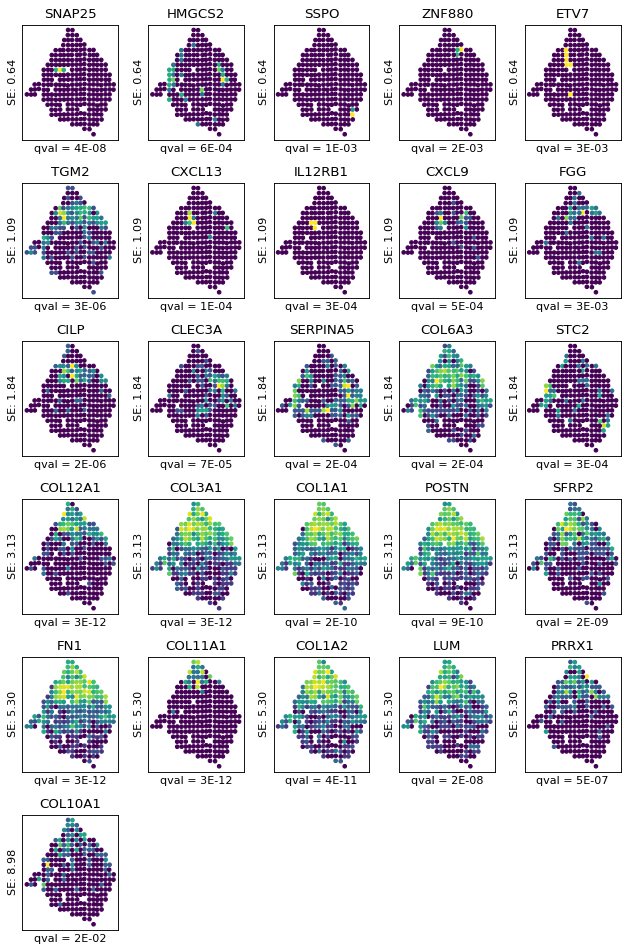

In [139]:
plt.figure(figsize=(8, 12), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby('l')):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        plt.subplot(N_rows, N, j * N + i + 1)
        plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=10);
        plt.title(r['g'])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('qval = {:.0E}'.format(r['qval']))
        if True:
            plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()
plt.savefig('top_BC_genes_per_ls.pdf')

In [140]:
from adjustText import adjust_text

In [141]:
N = 2
top_per_ls = results.query('qval < 0.05') \
                  .sort_values('qval', ascending=True) \
                  .groupby('l') \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])

14


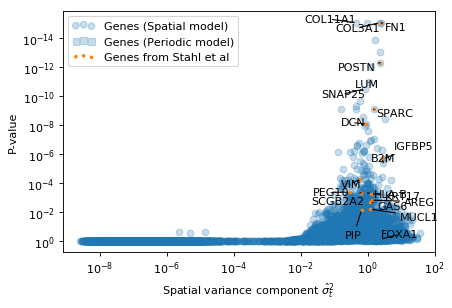

In [143]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('model == "SE"')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Spatial model)', marker='o', color='C0');

tmp = results.query('model == "PER"')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Periodic model)', marker='s', color='C0');


plt.xlim(None, 1e2)

tmp = results.query('g in ["IGFBP5", "SPARC", "VIM", "FN1", "POSTN", "MUCL1", "PIP", "SCGB2A2",' \
                        '"GAS6", "KRT17", "PEG10", "AREG", "MNP14", "DCN"]')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'], s=5, zorder=10, label='Genes from Stahl et al', color='C1');

texts = []
for i in tmp.index.union(results.query('g in ["LUM", "HLA-B", "B2M", "COL3A1", "FOXA1", "SNAP25", "COL11A1"]').index):
    if results.loc[i, 'max_s2_t_hat'] == 0.:
        continue
        
    if results.loc[i, 'pval'] < 1e-20:
        continue

    texts.append(plt.text(results.loc[i, 'max_s2_t_hat'], results.loc[i, 'pval'], results.loc[i, 'g']))
    
print(adjust_text(texts, arrowprops=dict(arrowstyle='-'),
                         force_points=0.1,
                         force_text=0.1,
                         force_objects=0.1,
                         zorder=20,
                         x=results['max_s2_t_hat'],
                         y=results['pval']))

    
plt.xlabel('Spatial variance component $\hat{\sigma}^2_t$');
plt.ylabel('P-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left')

plt.savefig('sigma_pval_BC.pdf', bbox_inches='tight');

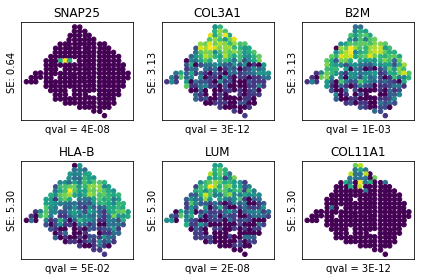

In [144]:
figsize(6, 4)
N = 3
N_rows = 2
select_genes = results.query('g in ["LUM", "HLA-B", "B2M", "COL3A1", "SNAP25", "COL11A1"]')
for i, idx in enumerate(select_genes.index):
    r = select_genes.loc[idx]
    plt.subplot(N_rows, N, i + 1)
    plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=20);
    plt.title(r['g'])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('qval = {:.0E}'.format(r['qval']))
    if True:
        plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()
plt.savefig('BC_select_genes.pdf')

6


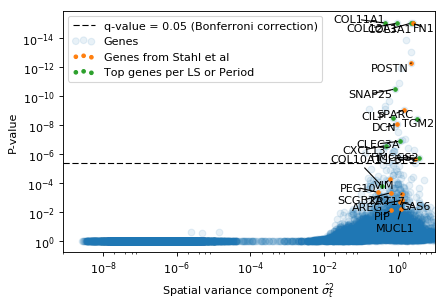

In [145]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')
plt.scatter(results['max_s2_t_hat'], results['pval'], alpha=0.1, rasterized=True, label='Genes');
plt.xlim(None, 1e1)

tmp = results.query('g in ["IGFBP5", "SPARC", "VIM", "FN1", "POSTN", "MUCL1", "PIP", "SCGB2A2",' \
                        '"GAS6", "KRT17", "PEG10", "AREG", "MNP14", "DCN"]')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'], s=10, zorder=10, label='Genes from Stahl et al');
texts = []
for i in tmp.index.union(top_per_ls.index):
    if results.loc[i, 'max_s2_t_hat'] == 0.:
        continue

    texts.append(plt.text(results.loc[i, 'max_s2_t_hat'], results.loc[i, 'pval'], results.loc[i, 'g']))
    
print(adjust_text(texts, arrowprops=dict(arrowstyle='-'),
                         force_points=0.1,
                         force_text=0.1,
                         force_objects=0.1,
                         zorder=20,
                         x=results['max_s2_t_hat'],
                         y=results['pval']))

plt.scatter(top_per_ls['max_s2_t_hat'], top_per_ls['pval'], s=10, label='Top genes per LS or Period');
    
plt.xlabel('Spatial variance component $\hat{\sigma}^2_t$');
plt.ylabel('P-value');
plt.gca().invert_yaxis()

plt.axhline(0.05 / results.shape[0], label='q-value = 0.05 (Bonferroni correction)', lw=1, linestyle='--', c='k')

plt.legend(scatterpoints=3)

plt.savefig('sigma_pval_BC_top.pdf', bbox_inches='tight');

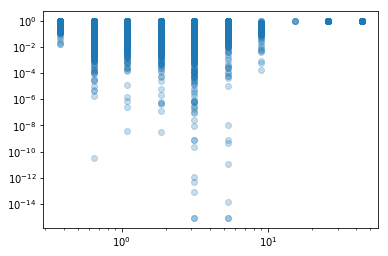

In [125]:
plt.xscale('log')
plt.yscale('log', nonpos='clip')

tmp = results.query('model == "SE"')
plt.scatter(tmp['l'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Spatial model)', marker='o', color='C0');

72


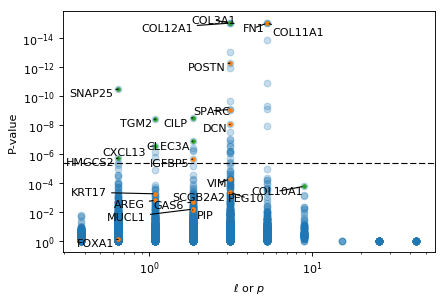

In [126]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log', nonpos='mask')

tmp = results.query('model == "SE"')
plt.scatter(tmp['l'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Spatial model)', marker='o', color='C0');

tmp = results.query('model == "PER"')
plt.scatter(tmp['l'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Periodic model)', marker='s', color='C0');

tmp = results.query('g in ["IGFBP5", "SPARC", "VIM", "FN1", "POSTN", "MUCL1", "PIP", "SCGB2A2",' \
                        '"GAS6", "KRT17", "PEG10", "AREG", "MNP14", "DCN", "FOXA1"]')
plt.scatter(tmp['l'], tmp['pval'], s=10, zorder=10, c='C1');
texts = []
for i in tmp.index.union(top_per_ls.index):
    if results.loc[i, 'l'] == 0.:
        continue

    texts.append(plt.text(results.loc[i, 'l'], results.loc[i, 'pval'], results.loc[i, 'g']))
    
print(adjust_text(texts, arrowprops=dict(arrowstyle='-'), force_text=0.2, zorder=20))

plt.scatter(top_per_ls['l'], top_per_ls['pval'], s=10, c='C2');
    
plt.xlabel('$\ell$ or $p$');
plt.ylabel('P-value');
plt.gca().invert_yaxis()

plt.axhline(0.05 / results.shape[0], label='q-value = 0.05 (Bonferroni correction)', lw=1, linestyle='--', c='k')

plt.savefig('lp_pval_BC_top.pdf', bbox_inches='tight');

In [146]:
results.sort_values('qval', ascending=True).head(30)

,g,max_delta,max_ll,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_null,D,pval,qval
12076,FN1,0.530862,-345.000761,-7.995903,2.534525,250,0.000503,5.298311,4,SE,712.087366,-409.776575,64.775814,8.881784e-16,2.854605e-12
10485,COL12A1,0.936785,-290.611447,-3.932797,0.980559,250,0.000409,3.125663,4,SE,603.308737,-361.539240,70.927793,8.881784e-16,2.854605e-12
10513,COL3A1,0.897263,-346.734279,-7.043813,2.330728,250,0.000405,3.125663,4,SE,715.554402,-417.319192,70.584913,8.881784e-16,2.854605e-12
12413,COL11A1,0.321270,-129.450629,-1.248962,0.452960,250,0.000588,5.298311,4,SE,280.987102,-221.546928,92.096299,8.881784e-16,2.854605e-12
12029,COL1A2,0.971151,-376.999721,-5.925453,1.629906,250,0.000405,5.298311,4,SE,776.085286,-436.248034,59.248313,1.387779e-14,3.568257e-11
10734,COL1A1,0.931953,-357.910445,-6.851407,2.294134,250,0.000401,3.125663,4,SE,737.906734,-413.489346,55.578900,8.981704e-14,1.924480e-10
10393,POSTN,1.085654,-350.154055,-7.397129,2.341853,250,0.000403,3.125663,4,SE,722.393953,-402.311807,52.157752,5.121459e-13,9.405925e-10
10858,SFRP2,1.389249,-321.110253,-5.203086,1.241389,250,0.000506,3.125663,4,SE,664.306349,-371.803002,50.692749,1.080136e-12,1.735779e-09
12008,LUM,1.388984,-342.923297,-5.819468,1.094831,250,0.000636,5.298311,4,SE,707.932437,-388.919239,45.995942,1.184985e-11,1.692686e-08
3249,SNAP25,0.000045,111.715654,-1.371608,0.838175,250,0.000313,0.641736,4,SE,-201.345464,67.668498,44.047156,3.205591e-11,4.121108e-08
